In [0]:
!nvidia-smi

Sat Apr  4 18:10:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!mkdir /root/.kaggle/
!cp drive/'My Drive'/kaggle.json /root/.kaggle/

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:35<00:00, 4.38MB/s]
100% 2.29G/2.29G [00:35<00:00, 69.8MB/s]


In [0]:
!unzip ./chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [0]:
!rm chest-xray-pneumonia.zip
!rm -r ./chest_xray/chest_xray/

In [0]:
from fastai.vision import *

In [0]:
data_path = Path('./chest_xray').absolute()
model_path = Path('./model').absolute()

In [0]:
data = ImageDataBunch.from_folder(data_path,
                                  valid_pct=0.2,
                                  size=256,
                                  ds_tfms=get_transforms()
                                 ).normalize(imagenet_stats)

In [0]:
print(data.classes, len(data.train_ds), len(data.valid_ds))

['NORMAL', 'PNEUMONIA'] 4685 1171


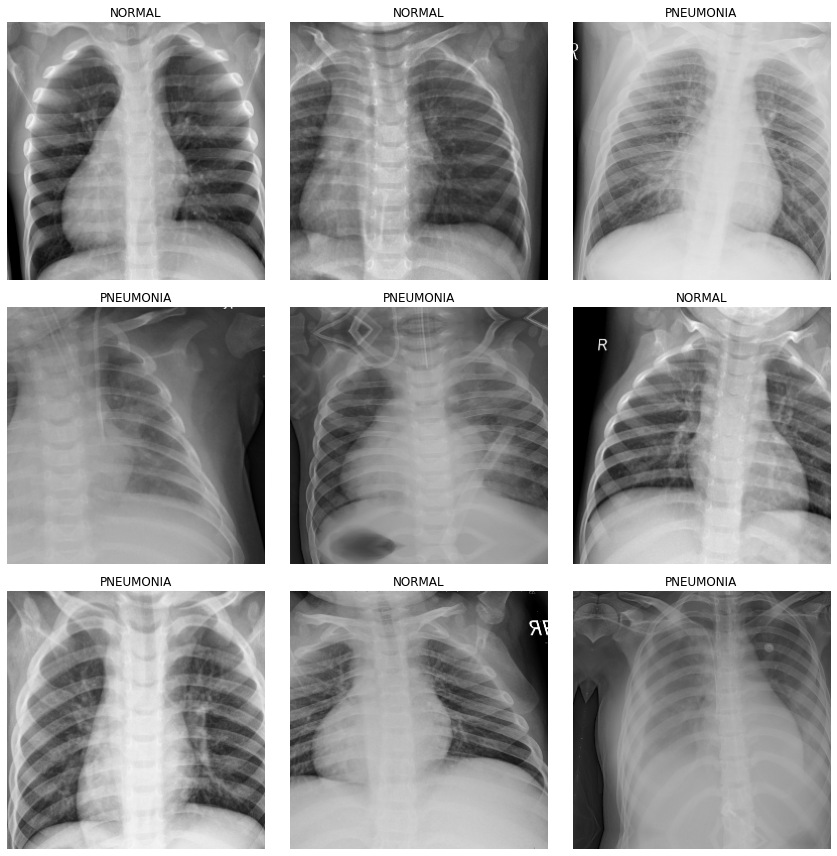

In [0]:
data.show_batch(rows=3)

In [0]:
learn = cnn_learner(data, 
                    models.resnet50, 
                    metrics=error_rate, 
                    model_dir=model_path)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


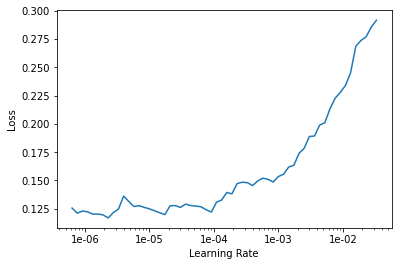

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.148617,0.613099,0.142613,04:05
1,0.147401,0.184381,0.040137,04:06
2,0.105206,0.102233,0.030743,04:06
3,0.085787,0.067073,0.017933,04:09
4,0.060677,0.078519,0.020495,04:07


In [0]:
learn.export(model_path / 'pneumonia.pkl')
learn.save(model_path / 'pneumonia')

In [0]:
!cp model/pneumonia.pkl drive/'My Drive'/